## Carbon emissions due to land use change

The formula to calculate the carbon emissions due to land use change would therefore be:

Carbon emissions due to land use change (tCO2e / year)  =  total tree cover area lost (Hectare) * Net forest GHG flux - 2001-2020 (tCO₂e / Hectare) * 10000/19 (unit conversion) *   probability purchase area (Hectare) 

Where: 

Probability purchase area is the potential area where a certain commodity has been purchased from. The calculation of this probability purchase area would be done following the workflow highlighted here.
Total tree cover area lost (Hectare) would be the total tree cover loss detected using Hansen data following the approach highlighted here.
Net forest GHG flux - 2001-2020 (tCO₂e / Hectare)  represents the net exchange of carbon between forests and the atmosphere between 2001 and 2020, calculated as the balance between carbon emitted by forests and removed by (or sequestered by) forests.
The division by 19 to obtain average annual net GHG flux and the multiplication by 10000 to ha.

The datasets that we will use are:

- Net forest GHG flux - 2001-2020 (tCO₂e / Hectare) * 10000/19 (unit conversion) from gfw


## 1. Import libraries

In [3]:
# import lib
import rasterio as rio
import rasterio.plot
import matplotlib.pyplot as plt
from rasterio.plot import show_hist

## 2. Generate risk map:

In [4]:
print('Net flux:')
filepath = 'https://tiles.globalforestwatch.org/gfw_forest_carbon_net_flux/v20210331/tcd_30/4/12/7.png'
with rio.open(filepath) as src:
    print(src.profile)

Net flux:
{'driver': 'PNG', 'dtype': 'uint8', 'nodata': None, 'width': 256, 'height': 256, 'count': 4, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'tiled': False, 'interleave': 'pixel'}


/opt/conda/lib/python3.8/site-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


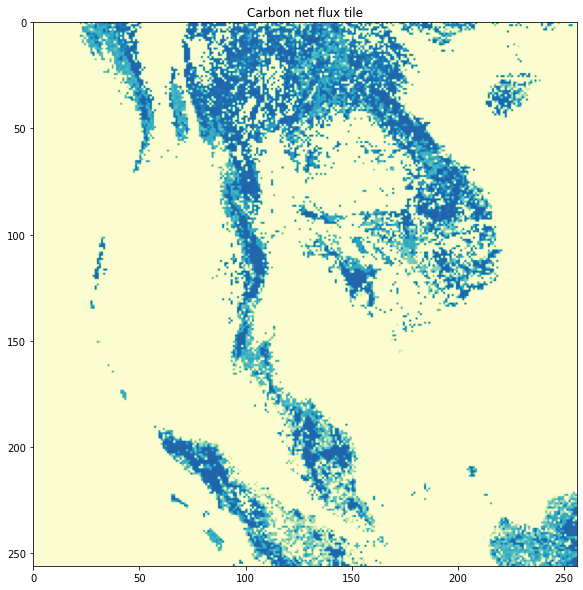

In [15]:
#check calculated risk map
with rio.open( 'https://tiles.globalforestwatch.org/gfw_forest_carbon_net_flux/v20210331/tcd_30/4/12/7.png') as src:
    dat = src.read(1)
    fig, ax = plt.subplots(figsize=[15,10])
    #ax.set_ylim((-5,40))
    #ax.set_xlim((60,100))
    rio.plot.show(dat, vmin=-10, vmax=350, cmap='YlGnBu', ax=ax, transform=src.transform)
    #gdf_india.plot(ax=ax, alpha=0.5, color='Orange', edgecolor='yellow')
    ax.set_title('Carbon net flux tile')